In [1]:
import os
for i in range(61, 128):
    yj = "mv " + str(i)+".png " + str(i-61) + ".png"
    os.system(yj)

In [2]:
import cv2
for i in range(20):
    img = str(i) + ".png"
    a = cv2.imread(img)
    b = cv2.cvtColor(a, cv2.COLOR_RGB2GRAY)
    b = cv2.resize(b,(640,480))
    cv2.imwrite(img,b)

In [1]:
import cv2
for i in range(26):
    a = cv2.imread(str(i) + '.png',-1)
    a1 = cv2.resize(a,(640,480))
    cv2.imwrite(str(i) + '.png',a1)

In [8]:
import cv2
for i in range(1):
    a = cv2.imread(str(i) + '.png', -1)
    print(a[412][332])

677


In [11]:
import cv2
a = cv2.imread(str(3) + '.png')
hflipImg = cv2.flip(a, 1)
cv2.imwrite(str(3) + '_.png', hflipImg)
    
    


True

In [4]:
import cv2
a = cv2.imread("0.png",-1)
a[240][320]

693

In [1]:
import cv2
import numpy as np

def CreatePointCloud():
    imgName1 =  "ROI.png"
    depthImg = cv2.imread(imgName1,-1)
    print(depthImg.shape)
    h, w = depthImg.shape
    camera = np.eye(3,3)
    print(camera)

    fx = 517.448 
    fy = 517.448
    cx = 305.432
    cy = 250.411

    camera[0][0] = fx
    camera[0][2] = cx
    camera[1][1] = fy
    camera[1][2] = cy

    print(camera)

    cameraInv = np.linalg.inv(camera)

    # print(np.dot(camera, cameraInv))

    pointTxt = []

    for i in range(h):
        for ii in range(w):
            if depthImg[i][ii] and i%2 == 0 and ii%2  == 0:
                pointAxis = depthImg[i][ii] * np.dot(cameraInv, np.array([[i], [ii], [1]]))
                pointAxis = np.transpose(pointAxis)
                tem = pointAxis.tolist()
                pointTxt.append(tem[0])
    print(len(pointTxt))
    fileName = "ROI.txt"
    np.savetxt(fileName, pointTxt)



In [4]:
CreatePointCloud()

(283, 168)
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[517.448   0.    305.432]
 [  0.    517.448 250.411]
 [  0.      0.      1.   ]]
9450


In [1]:
import cv2
import numpy as np

def CreatePointCloud(cnt, step = 8, x = 0, y = 0, x_ = 640, y_ = 480):
    imgName1 = str(cnt) + ".png"
    depthImg = cv2.imread(imgName1,-1)
    print(depthImg.shape)
    h, w = depthImg.shape
    camera = np.eye(3,3)
    print(camera)

    fx = 517.448 
    fy = 517.448
    cx = 305.432
    cy = 250.411

    camera[0][0] = fx
    camera[0][2] = cx
    camera[1][1] = fy
    camera[1][2] = cy

    print(camera)

    cameraInv = np.linalg.inv(camera)
    print(cameraInv)

    # print(np.dot(camera, cameraInv))

    pointTxt = []

    for i in range(y, y_, step):
        for ii in range(x, x_, step):
            if depthImg[i][ii] and depthImg[i][ii] < 1000:
                pointAxis = depthImg[i][ii] * np.dot(cameraInv, np.array([[i], [ii], [1]]))
                pointAxis = np.transpose(pointAxis)
                tem = pointAxis.tolist()
                pointTxt.append(tem[0])
    print(len(pointTxt))
    fileName = str(cnt) + ".txt"
#     np.savetxt(fileName, pointTxt)

# CreatePointCloud(0, 100,100,300,300)
for i in range(1):
    CreatePointCloud(i,4)


(480, 640)
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[517.448   0.    305.432]
 [  0.    517.448 250.411]
 [  0.      0.      1.   ]]
[[ 0.00193256  0.         -0.59026608]
 [ 0.          0.00193256 -0.48393462]
 [ 0.          0.          1.        ]]
891


In [1]:
import cv2
import numpy


In [2]:
img = cv2.imread('0.png',-1)

[[177 177 175 ...   0   0   0]
 [177 177 177 ...   0   0   0]
 [177 177 177 ... 188   0   0]
 ...
 [  0  56  56 ...   0   0   0]
 [  0   0  56 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


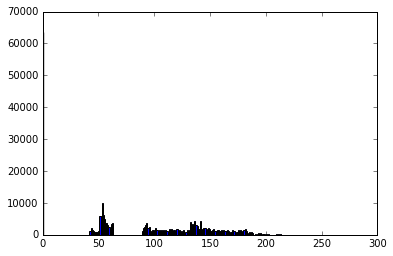

error: /build/opencv-ys8xiq/opencv-2.4.9.1+dfsg/modules/imgproc/src/thresh.cpp:783: error: (-210)  in function threshold


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import mahotas
%matplotlib inline

# 导入图片
img = cv2.imread('5.png',-1)
img /= 15

print img

# T = mahotas.thresholding.otsu(img)
# print(T)
# 利用直方图绘制函数
# 其中用到的参数有：img.ravel()，将多维数组转换为一维数组（若没必要，不会产生数据源的副本），用来指定每个bin(箱子)分布的数据，对应x轴
# 256 指定bin(箱子)的个数，也就是总共有几条条柱
# [0, 256] 是范围
# 其实还有别的参数可以使用，比如直方图的颜色，边框颜色，透明度，直方图类型，normed是否将得到的直方图向量归一化
plt.hist(img.ravel(),255,[0,255]); plt.show()

# thresh = img.copy()

# thresh[thresh > 80] = 255
# thresh[thresh <= 80] = 0
# # h,w = img.shape
# # for i in range(h):
# #     for ii in range(w):
# #         if img[i][ii] > 1000:
# #             img[i][ii] = 0
# #         else:
# #             img[i][ii] = 1

# cv2.imshow('inv.png', thresh)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

ret,binary = cv2.threshold(img,80,255,cv2.THRESH_BINARY)
cv2.imshow("inv", binary)

# cv2.imshow('inv.png', thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
cv2.imread('0.png',-1)

array([[   0, 2397, 2397, ...,    0,    0,    0],
       [   0, 2397, 2397, ...,    0,    0,    0],
       [   0, 2397, 2397, ..., 3236,    0,    0],
       ...,
       [   0,  860,  860, ...,    0,    0,    0],
       [   0,    0,  860, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]], dtype=uint16)

In [1]:
import numpy as np



In [2]:
camera = np.eye(3,3)
print(camera)

fx = 517.448 
fy = 517.448
cx = 305.432
cy = 250.411

camera[0][0] = fx
camera[0][2] = cx
camera[1][1] = fy
camera[1][2] = cy

print(camera)

cameraInv = np.linalg.inv(camera)

800 * np.dot(cameraInv, np.array([[240],[320],[1]]))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[517.448   0.    305.432]
 [  0.    517.448 250.411]
 [  0.      0.      1.   ]]


array([[-101.16108285],
       [ 107.58800884],
       [ 800.        ]])

In [ ]:
[-60, 60, 480]